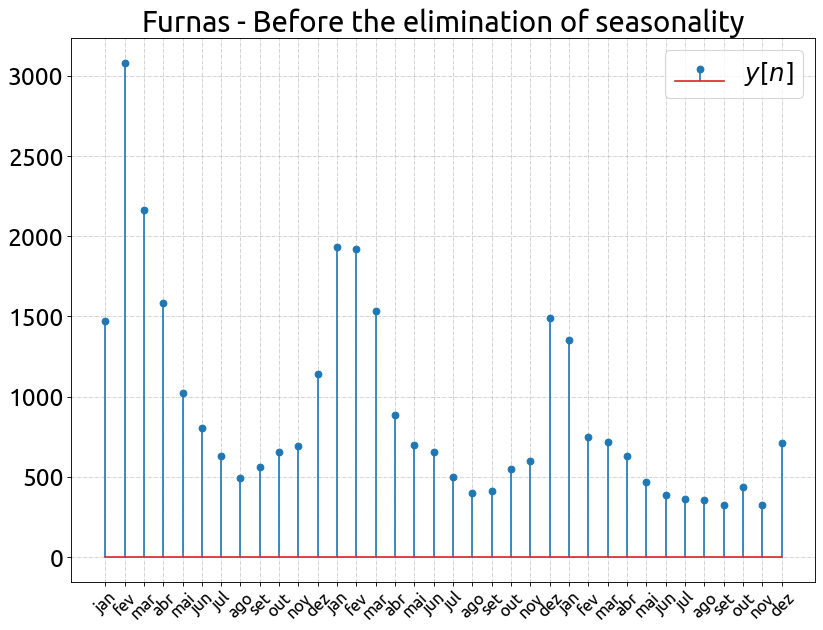

In [33]:
from numpy import genfromtxt, log as ln, sqrt, arange
import matplotlib.pyplot as plt

plt.rcParams.update({'font.family': 'Ubuntu', 'font.weight': 'normal', 'font.size': 22})
furnas = genfromtxt('./data/furnas.dat', dtype=float, delimiter='  ')

furnas = furnas.flatten('C')

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 9), dpi=80)
ax = fig.gca()
# ax.plot(y_hat[:N], 'y--', zorder=2, label='$\hat{y}[k]$')
ax.stem(furnas[:3*12])
ax.grid(True, linestyle='-.', linewidth=.5)
ax.set_axisbelow(True)
ax.set_xticks(arange(furnas[:3*12].size), labels=('jan', 'fev', 'mar', 'abr', 'mai', 'jun', 'jul', 'ago', 'set', 'out', 'nov', 'dez')*3, rotation=45, fontsize=15)
plt.title('Furnas - Before the elimination of seasonality')
plt.show()

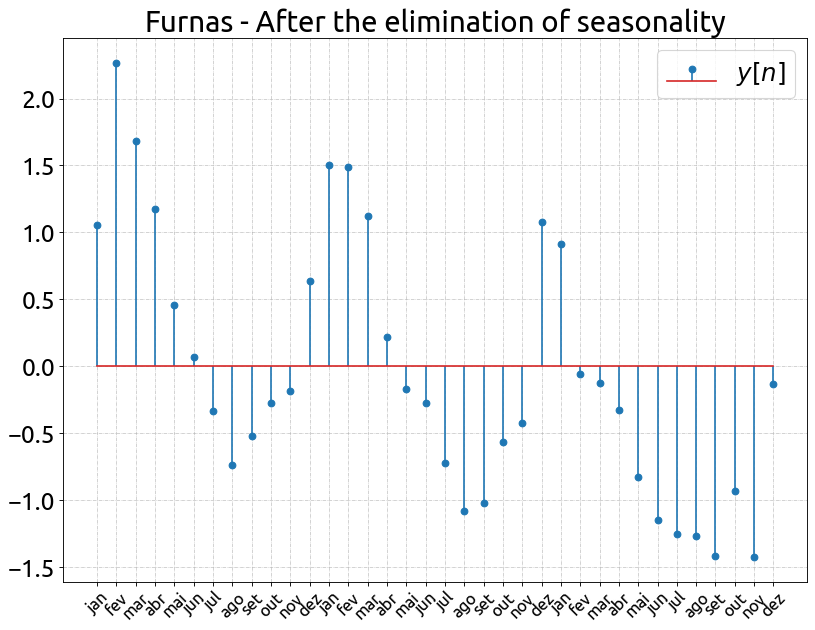

In [38]:
y = ln(furnas)
# mean estimation
mu_y = sum(y)/y.size
# variance estimation
sigma2 = sum((y - mu_y)**2)/(y.size-1)
# transformed time series
z = (y - mu_y)/sqrt(sigma2)

fig = plt.figure(figsize=(12, 9), dpi=80)
ax = fig.gca()
ax.set_axisbelow(True)
# ax.plot(y_hat[:N], 'y--', zorder=2, label='$\hat{y}[k]$')
ax.stem(z[:3*12], label='$y[n]$')
ax.legend(loc="upper right")
ax.set_xticks(arange(furnas[:3*12].size), labels=('jan', 'fev', 'mar', 'abr', 'mai', 'jun', 'jul', 'ago', 'set', 'out', 'nov', 'dez')*3, rotation=45, fontsize=15)
plt.title('Furnas - After the elimination of seasonality')
plt.grid(True, linestyle='-.', linewidth=.5)
plt.show()